In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
from datetime import datetime

x, y, t = [], [], []
for m in xrange(1, 13):
    src = np.load('../data/datasets/seville-sn-1-2017%02d21.npz' % m)
    x.append(src['x'])
    y.append(src['y'])
    t.append(src['t'])
x = np.array(x)
y = np.array(y)
t = np.array(t)
print x.shape, y.shape, t.shape, x[0].shape, y[0].shape, t[0].shape
print x[0].min(), x[0].max()

(12,) (12,) (12,) (7560, 2) (7560,) (7560,)
-3.00041443506 9.40250011731


In [2]:
def time2area(tt):
    s = tt.second / 60.
    m = tt.minute / 60.
    h = tt.hour / 12.
    return h + .1 * m + .01 * s

print "Example:", t[0][0].time(), t[0][0].hour, t[0][0].minute, t[0][0].second, time2area(t[0][0])

Example: 07:34:18.578049 7 34 18 0.643


In [3]:
for m in xrange(12):
    t[m] = np.array([(time2area(datetime(2017, 6, 21, 12, 0, 0)) - time2area(tt)) for tt in t[m]])

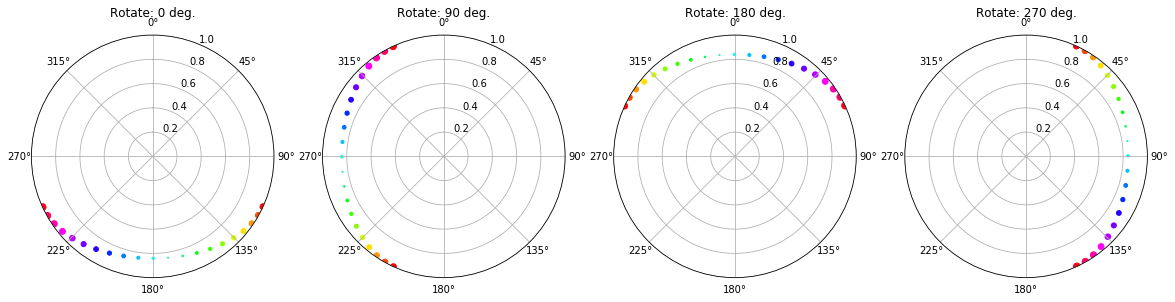

In [4]:
m = 1
plt.figure(1, figsize=(20, 5))
rot = 0
# print x[y==rot]
ax = plt.subplot(141, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
plt.scatter(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]),
            s=100 * np.abs(t[m-1][y[m-1]==rot]), c=np.arange((y[m-1]==rot).sum()), cmap=cmx.hsv)
plt.ylim([0, 1])
plt.title("Rotate: 0 deg.")
rot = 90
ax = plt.subplot(142, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
plt.scatter(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]),
            s=100 * np.abs(t[m-1][y[m-1]==rot]), c=np.arange((y[m-1]==rot).sum()), cmap=cmx.hsv)
plt.ylim([0, 1])
plt.title("Rotate: 90 deg.")
rot = 180
ax = plt.subplot(143, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
plt.scatter(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]),
            s=100 * np.abs(t[m-1][y[m-1]==rot]), c=np.arange((y[m-1]==rot).sum()), cmap=cmx.hsv)
plt.ylim([0, 1])
plt.title("Rotate: 180 deg.")
rot = 270
ax = plt.subplot(144, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
plt.scatter(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]),
            s=100 * np.abs(t[m-1][y[m-1]==rot]), c=np.arange((y[m-1]==rot).sum()), cmap=cmx.hsv)
plt.ylim([0, 1])
plt.title("Rotate: 270 deg.")
plt.show()

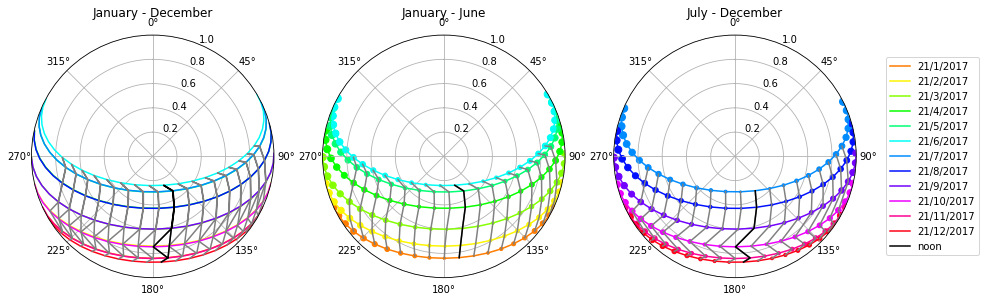

In [5]:
plt.figure(1, figsize=(20, 5))
rot = 0

ax = plt.subplot(141, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
n, ns = [], []
for m in xrange(1, 13):
    plt.plot(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]), color=cmx.hsv(m/12.), label="21/%0d/2017" % m)
    i = np.argmin(np.abs(t[m-1][y[m-1]==rot]))
    n.append(x[m-1][y[m-1]==rot][i])
    ns.append(x[m-1][y[m-1]==rot][i-8:i+9])
n = np.array(n)
ns = np.array(ns)
for i in xrange(ns.shape[1]):
    plt.plot(ns[:, i, 0], np.sin(ns[:, i, 1]), color='grey')
plt.plot(n[:, 0], np.sin(n[:, 1]), color='k', label="noon")
plt.ylim([0, 1])
plt.title("January - December")
plt.legend(loc="center left", bbox_to_anchor=(3.5, .5))

ax = plt.subplot(142, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
for m in xrange(1, 7):
    plt.scatter(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]),
            s=100 * np.abs(t[m-1][y[m-1]==rot]), c=cmx.hsv(m/12.), cmap=cmx.hsv)
    plt.plot(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]), color=cmx.hsv(m/12.))
for i in xrange(ns.shape[1]):
    plt.plot(ns[:6, i, 0], np.sin(ns[:6, i, 1]), color='grey')
plt.plot(n[:6, 0], np.sin(n[:6, 1]), color='k')
plt.ylim([0, 1])
plt.title("January - June")

ax = plt.subplot(143, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
for m in xrange(7, 13):
    plt.scatter(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]),
            s=100 * np.abs(t[m-1][y[m-1]==rot]), c=cmx.hsv(m/12.), cmap=cmx.hsv)
    plt.plot(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]), color=cmx.hsv(m/12.))
for i in xrange(ns.shape[1]):
    plt.plot(ns[6:, i, 0], np.sin(ns[6:, i, 1]), color='grey')
plt.plot(n[6:, 0], np.sin(n[6:, 1]), color='k')
plt.ylim([0, 1])
plt.title("July - December")
plt.show()

In [6]:
d_x, d_y = [], []
for m in xrange(12):
    d_x.append((x[m][1:] - x[m][:-1]) / 18e+2)
    d_y.append(y[m][1:])
d_x = np.array(d_x)
d_y = np.array(d_y)

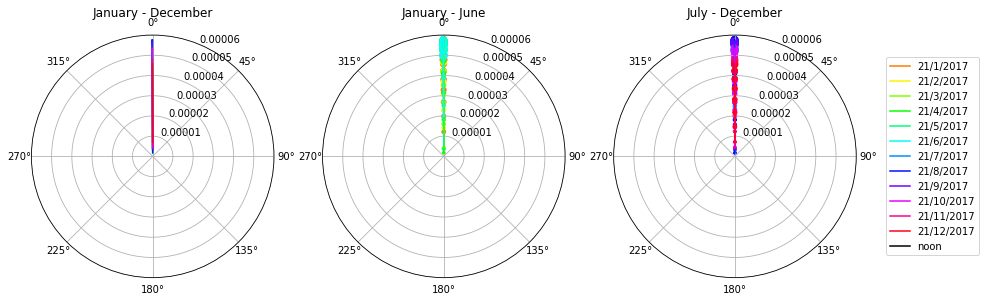

In [7]:
plt.figure(1, figsize=(20, 5))
rot = 0

ax = plt.subplot(141, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
n = []
for m in xrange(1, 13):
    plt.plot(d_x[m-1][d_y[m-1]==rot][:, 0], d_x[m-1][d_y[m-1]==rot][:, 1], color=cmx.hsv(m/12.), label="21/%0d/2017" % m)
    i = np.argmin(np.abs(t[m-1][1:][d_y[m-1]==rot]))
    n.append(d_x[m-1][d_y[m-1]==rot][i])
n = np.array(n)
plt.plot(n[:, 0], np.sin(n[:, 1]), color='k', label="noon")
plt.ylim([0, 6e-5])
plt.title("January - December")
plt.legend(loc="center left", bbox_to_anchor=(3.5, .5))

ax = plt.subplot(142, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
for m in xrange(1, 7):
    plt.scatter(d_x[m-1][d_y[m-1]==rot][:, 0], np.sin(d_x[m-1][d_y[m-1]==rot][:, 1]),
            s=100 * np.abs(t[m-1][1:][d_y[m-1]==rot]), c=cmx.hsv(m/12.), cmap=cmx.hsv)
    plt.plot(d_x[m-1][d_y[m-1]==rot][:, 0], np.sin(d_x[m-1][d_y[m-1]==rot][:, 1]), color=cmx.hsv(m/12.))
plt.plot(n[:6, 0], np.sin(n[:6, 1]), color='k', label="noon")
plt.ylim([0, 6e-5])
plt.title("January - June")

ax = plt.subplot(143, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
for m in xrange(7, 13):
    plt.scatter(d_x[m-1][d_y[m-1]==rot][:, 0], np.sin(d_x[m-1][d_y[m-1]==rot][:, 1]),
            s=100 * np.abs(t[m-1][1:][d_y[m-1]==rot]), c=cmx.hsv(m/12.), cmap=cmx.hsv)
    plt.plot(d_x[m-1][d_y[m-1]==rot][:, 0], np.sin(d_x[m-1][d_y[m-1]==rot][:, 1]), color=cmx.hsv(m/12.))
plt.plot(n[6:, 0], np.sin(n[6:, 1]), color='k', label="noon")
plt.ylim([0, 6e-5])
plt.title("July - December")
plt.show()

In [8]:
xx = np.concatenate(x, axis=0)
yy = np.concatenate(y, axis=0)
tt = np.concatenate(t, axis=0)

print xx.shape, yy.shape, tt.shape

(108000, 2) (108000,) (108000,)


In [9]:
xxx = np.concatenate((xx % (2 * np.pi), tt[:, np.newaxis], np.deg2rad(yy[:, np.newaxis])), axis=-1)
print xxx.shape
print xxx.min(axis=0)
print xxx.max(axis=0)

(108000, 4)
[  2.89536002e-05   2.45134072e-01  -6.39833333e-01   0.00000000e+00]
[ 6.28310846  1.57552542  0.57683333  6.26573201]


In [10]:
mu = xxx.mean(axis=0)
C = (xxx-mu).T.dot(xxx-mu) / xxx.shape[0]

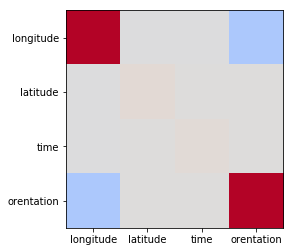

In [11]:
plt.figure(1)
plt.imshow(C, vmin=-3, vmax=3, cmap="coolwarm")
# plt.colorbar()
plt.xticks([0, 1, 2, 3], ["longitude", "latitude", "time", "orentation"])
plt.yticks([0, 1, 2, 3], ["longitude", "latitude", "time", "orentation"])
plt.show()

In [12]:
import sys
import os
sys.path.append(os.path.abspath("../"))

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from learn import angdist

ln = LinearRegression(n_jobs=3)
nn = MLPRegressor(hidden_layer_sizes=(360,), activation='logistic', alpha=1e-4, solver='adam', max_iter=500)

ln.fit(xxx[:, :3], xxx[:, 3])
p_ln = ln.predict(xxx[:, :3])
acc_ln = 1 - angdist(xxx[:, 3], p_ln).mean() / np.pi
print "Linear Regression   - Accuracy:", acc_ln

nn.fit(xxx[:, :3], xxx[:, 3])
p_nn = nn.predict(xxx[:, :3])
acc_nn = 1 - angdist(xxx[:, 3], p_nn).mean() / np.pi
print "Neural Network      - Accuracy:", acc_nn

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.
Linear Regression   - Accuracy: 0.53422464517
Neural Network      - Accuracy: 0.870885851508


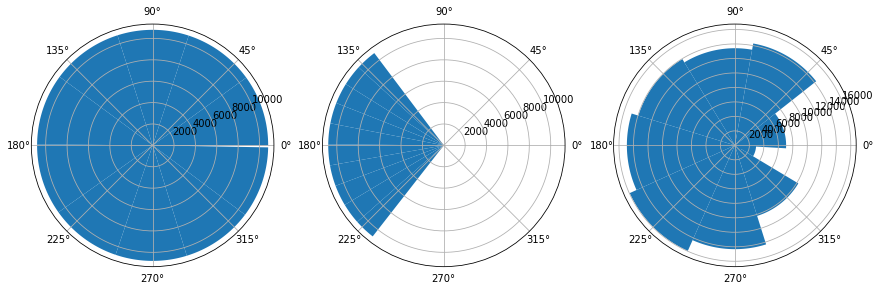

In [13]:
plt.figure(1, figsize=(20, 5))
plt.subplot(141, polar=True)
plt.hist(xxx[:, 3])
plt.subplot(142, polar=True)
plt.hist(p_ln)
plt.subplot(143, polar=True)
plt.hist(p_nn)
plt.show()

In [14]:
xxxx = np.concatenate((np.sin(xx[:, 0])[:, np.newaxis], np.cos(xx[:, 0])[:, np.newaxis],
                       tt[:, np.newaxis], np.deg2rad(yy[:, np.newaxis])), axis=-1)
print xxxx.shape

(108000, 4)


In [15]:
mu = xxxx.mean(axis=0)
C = (xxxx-mu).T.dot(xxxx-mu) / xxxx.shape[0]

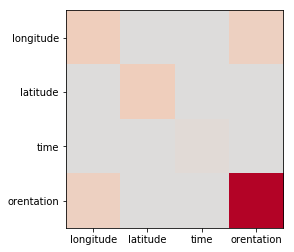

In [16]:
plt.figure(1)
plt.imshow(C, vmin=-3, vmax=3, cmap="coolwarm")
# plt.colorbar()
plt.xticks([0, 1, 2, 3], ["longitude", "latitude", "time", "orentation"])
plt.yticks([0, 1, 2, 3], ["longitude", "latitude", "time", "orentation"])
plt.show()

In [17]:
ln.fit(xxxx[:, :3], xxxx[:, 3])
p_ln = ln.predict(xxxx[:, :3])
acc_ln = 1 - angdist(xxxx[:, 3], p_ln).mean() / np.pi
print "Linear Regression   - Accuracy:", acc_ln

nn.fit(xxxx[:, :3], xxxx[:, 3])
p_nn = nn.predict(xxxx[:, :3])
acc_nn = 1 - angdist(xxxx[:, 3], p_nn).mean() / np.pi
print "Neural Network      - Accuracy:", acc_nn

Linear Regression   - Accuracy: 0.567897108121
Neural Network      - Accuracy: 0.568406646049


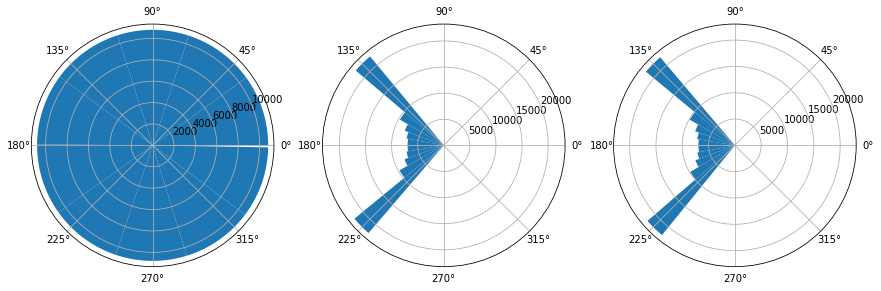

In [18]:
plt.figure(1, figsize=(20, 5))
plt.subplot(141, polar=True)
plt.hist(xxxx[:, 3])
plt.subplot(142, polar=True)
plt.hist(p_ln)
plt.subplot(143, polar=True)
plt.hist(p_nn)
plt.show()

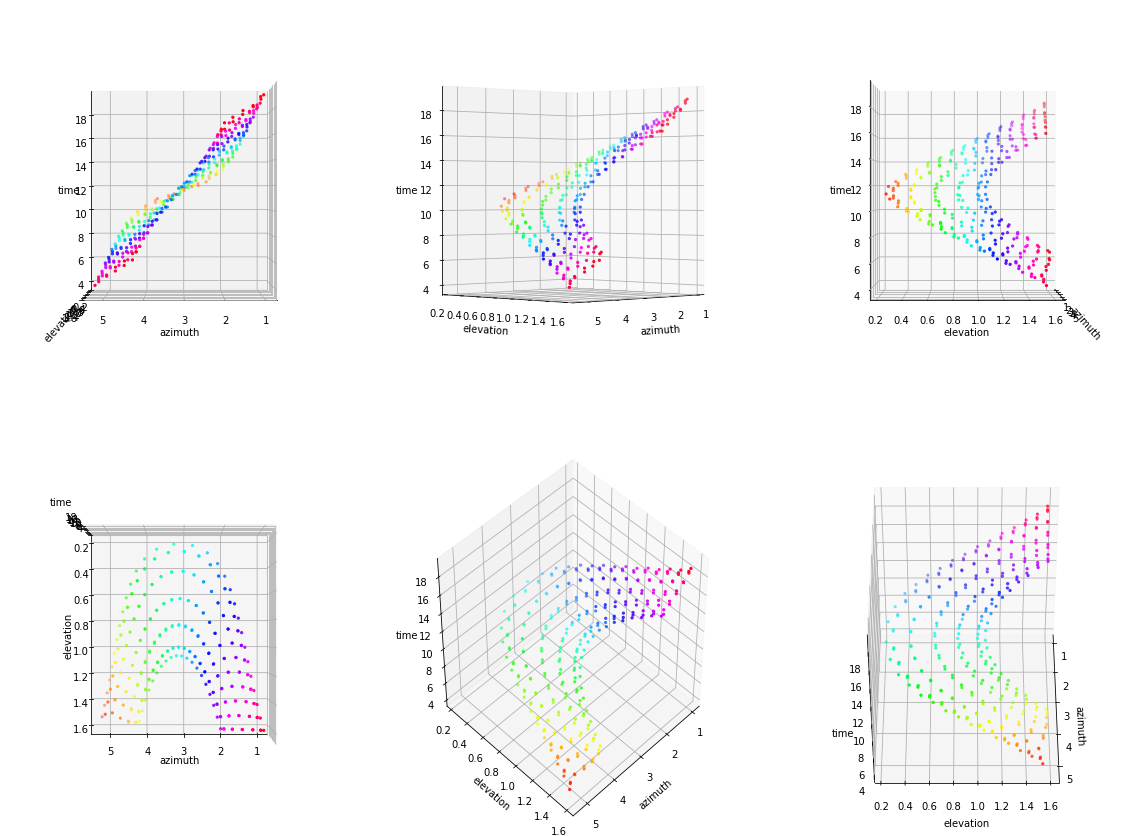

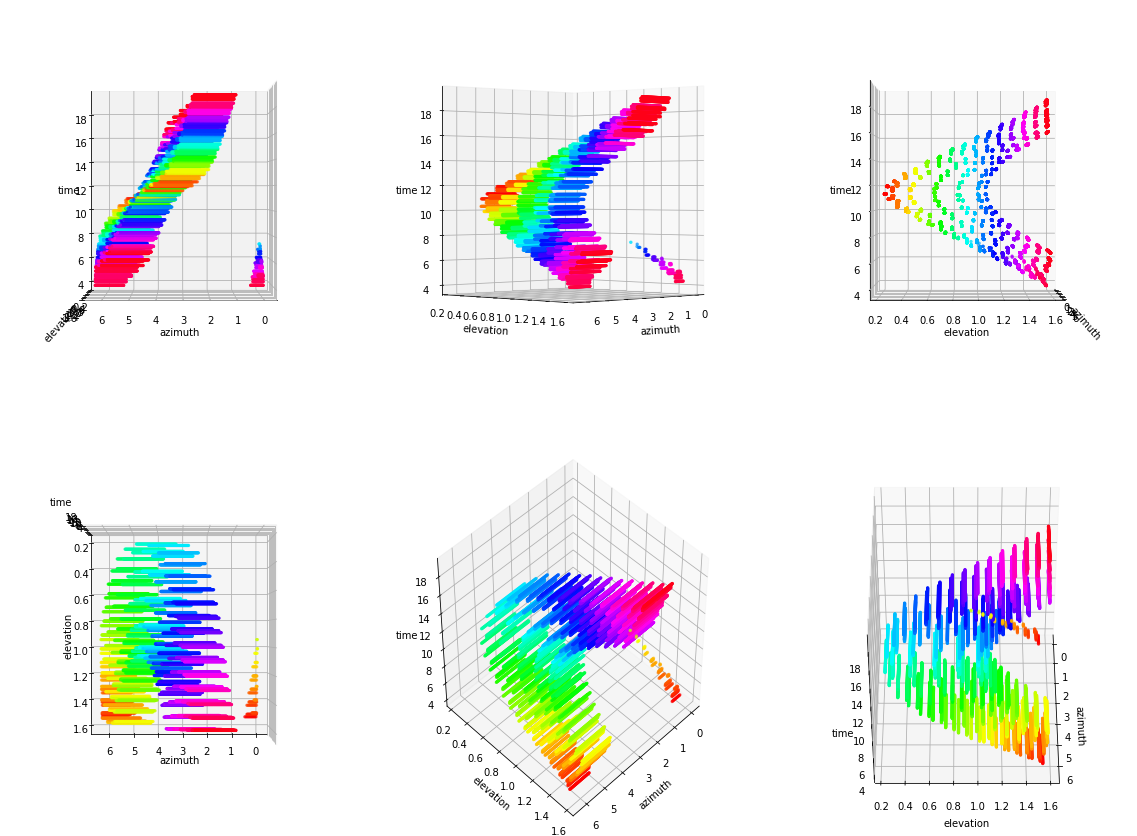

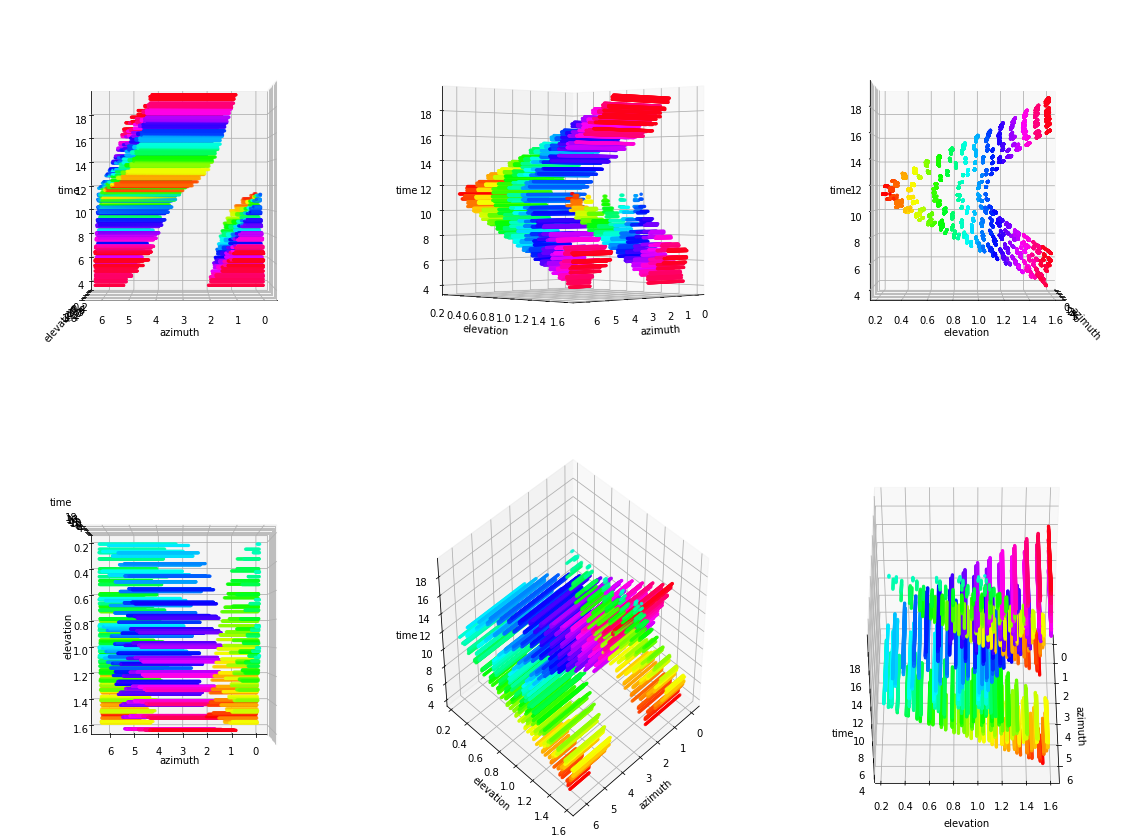

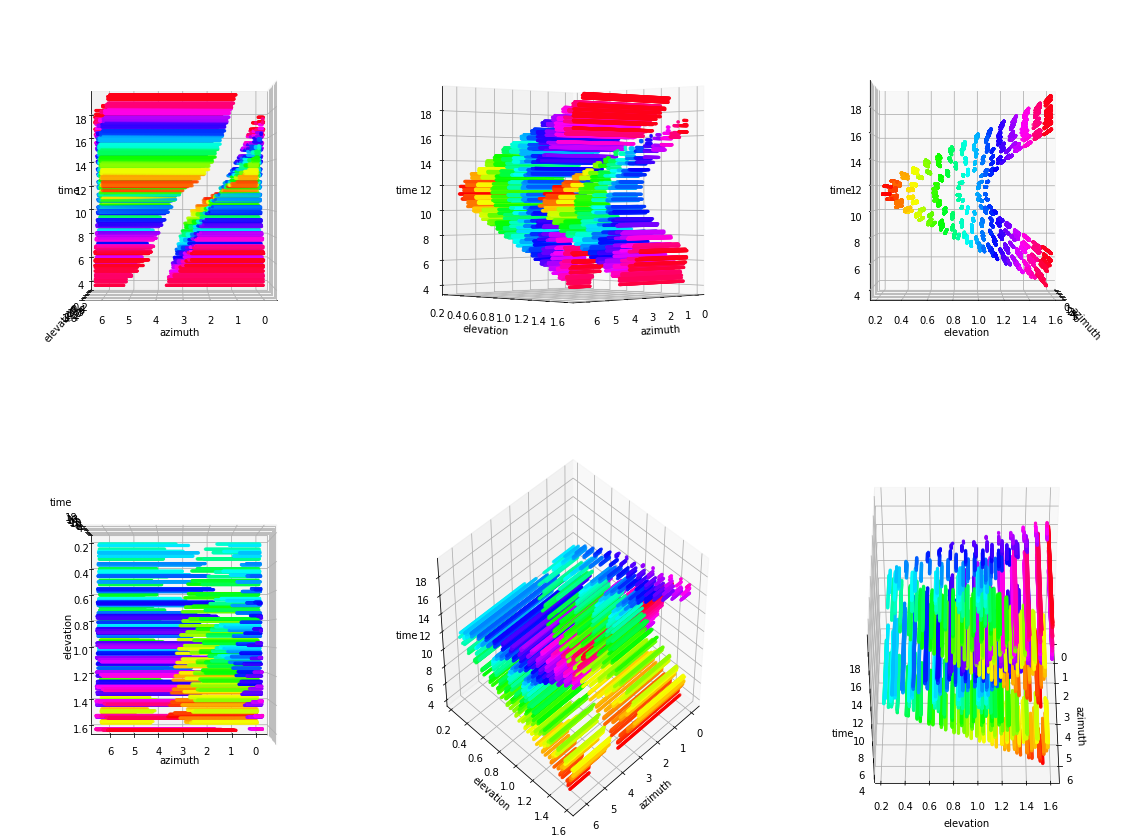

In [20]:
from mpl_toolkits.mplot3d import Axes3D

for i in xrange(4):
    angs = 90 * i
    if angs == 0:
        angs = 1
    plt.figure(i+1, figsize=(20, 15))
    ax = plt.subplot(231, projection='3d')
    ax.scatter3D([xxx[:, 0][ang::360] for ang in range(angs)],
                 [xxx[:, 1][ang::360] for ang in range(angs)],
                 [12 * xxx[:, 2][ang::360] + 12 for ang in range(angs)],
                 marker='.', c=[xxx[:, 1][ang::360] for ang in range(angs)], cmap='hsv')
    ax.set_xlabel("azimuth")
    ax.set_ylabel("elevation")
    ax.set_zlabel("time")
    ax.view_init(0, 90)
    ax = plt.subplot(232, projection='3d')
    ax.scatter3D([xxx[:, 0][ang::360] for ang in range(angs)],
                 [xxx[:, 1][ang::360] for ang in range(angs)],
                 [12 * xxx[:, 2][ang::360] + 12 for ang in range(angs)],
                 marker='.', c=[xxx[:, 1][ang::360] for ang in range(angs)], cmap='hsv')
    ax.set_xlabel("azimuth")
    ax.set_ylabel("elevation")
    ax.set_zlabel("time")
    ax.view_init(0, 45)
    ax = plt.subplot(233, projection='3d')
    ax.scatter3D([xxx[:, 0][ang::360] for ang in range(angs)],
                 [xxx[:, 1][ang::360] for ang in range(angs)],
                 [12 * xxx[:, 2][ang::360] + 12 for ang in range(angs)],
                 marker='.', c=[xxx[:, 1][ang::360] for ang in range(angs)], cmap='hsv')
    ax.set_xlabel("azimuth")
    ax.set_ylabel("elevation")
    ax.set_zlabel("time")
    ax.view_init(0, 0)
    ax = plt.subplot(234, projection='3d')
    ax.scatter3D([xxx[:, 0][ang::360] for ang in range(angs)],
                 [xxx[:, 1][ang::360] for ang in range(angs)],
                 [12 * xxx[:, 2][ang::360] + 12 for ang in range(angs)],
                 marker='.', c=[xxx[:, 2][ang::360] for ang in range(angs)], cmap='hsv')
    ax.set_xlabel("azimuth")
    ax.set_ylabel("elevation")
    ax.set_zlabel("time")
    ax.view_init(90, 90)
    ax = plt.subplot(235, projection='3d')
    ax.scatter3D([xxx[:, 0][ang::360] for ang in range(angs)],
                 [xxx[:, 1][ang::360] for ang in range(angs)],
                 [12 * xxx[:, 2][ang::360] + 12 for ang in range(angs)],
                 marker='.', c=[xxx[:, 2][ang::360] for ang in range(angs)], cmap='hsv')
    ax.set_xlabel("azimuth")
    ax.set_ylabel("elevation")
    ax.set_zlabel("time")
    ax.view_init(45, 45)
    ax = plt.subplot(236, projection='3d')
    ax.scatter3D([xxx[:, 0][ang::360] for ang in range(angs)],
                 [xxx[:, 1][ang::360] for ang in range(angs)],
                 [12 * xxx[:, 2][ang::360] + 12 for ang in range(angs)],
                 marker='.', c=[xxx[:, 2][ang::360] for ang in range(angs)], cmap='hsv')
    ax.set_xlabel("azimuth")
    ax.set_ylabel("elevation")
    ax.set_zlabel("time")
    ax.view_init(45, 0)
plt.show()

In [75]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import *

p = np.random.permutation(xxx.shape[0])

x_train = xxx[p[:10000], :2]
y_train = xxx[p[:10000], 3]
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
# kernel = 1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1)
# kernel = 1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0,
#                               length_scale_bounds=(0.1, 10.0), periodicity_bounds=(1.0, 10.0))
# kernel = ConstantKernel(0.1, (0.01, 10.0)) * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.0, 10.0)) ** 2)
# kernel = 1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0), nu=1.5)

gp = GaussianProcessRegressor(kernel=kernel)
gp.fit(x_train, y_train)

KeyboardInterrupt: 

In [22]:
p_gp = gp.predict(x_train)
acc_gp = 1 - angdist(y_train, p_gp).mean() / np.pi
print "Gaussian Process   - Accuracy:", acc_gp

Gaussian Process   - Accuracy: 0.579293737157


In [25]:
p_test = np.concatenate([p[:10000], p[-10000:]])
p_test = p_test[np.argsort(xxx[p_test, 0])]
x_test = xxx[p_test, :2]
y_test = xxx[p_test, 3]

p_gp, sigma = gp.predict(x_test, return_std=True)
acc_gp = 1 - angdist(y_test, p_gp).mean() / np.pi
print "Gaussian Process   - Accuracy:", acc_gp

Gaussian Process   - Accuracy: 0.578828707314


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


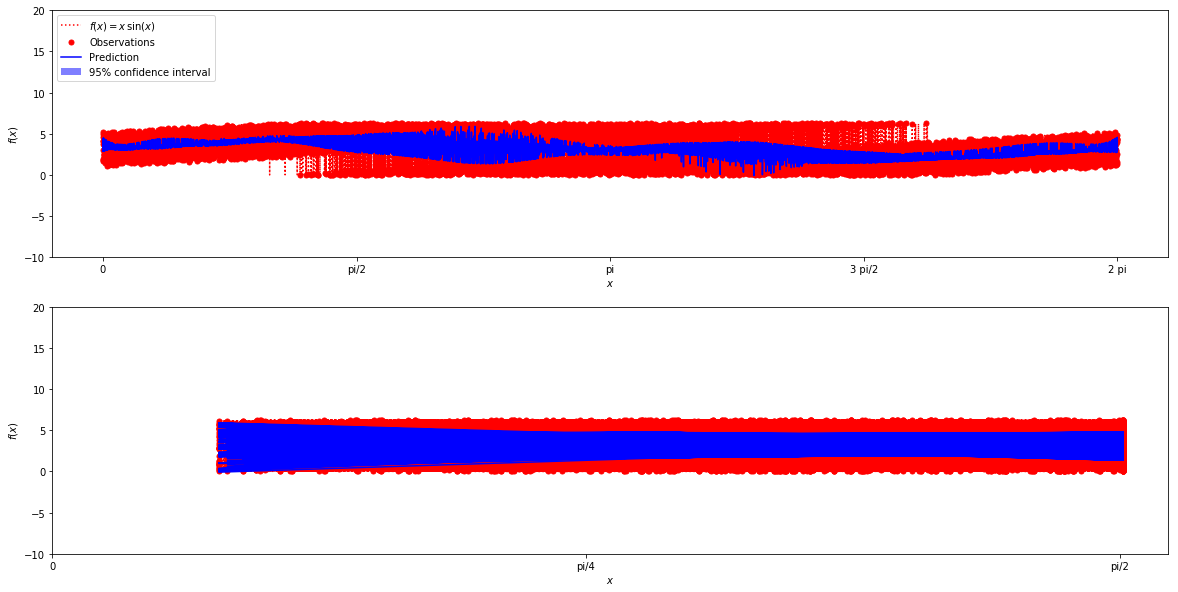

In [29]:
plt.figure(1, figsize=(20, 10))
plt.subplot(211)
plt.plot(x_test[:, 0], y_test, 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(x_train[:, 0], y_train, 'r.', markersize=10, label=u'Observations')
plt.plot(x_test[:, 0], p_gp, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x_test[:, 0], x_test[::-1, 0]]),
         np.concatenate([y_test - sigma, (y_test + sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ["0", "pi/2", "pi", "3 pi/2", "2 pi"])
plt.legend(loc='upper left')

plt.subplot(212)
plt.plot(x_test[:, 1], y_test, 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(x_train[:, 1], y_train, 'r.', markersize=10, label=u'Observations')
plt.plot(x_test[:, 1], p_gp, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x_test[:, 1], x_test[::-1, 1]]),
         np.concatenate([y_test - sigma, (y_test + sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xticks([0, np.pi/4, np.pi/2], ["0", "pi/4", "pi/2"])
plt.ylim(-10, 20)
plt.show()

In [141]:
p = np.random.permutation(xxx.shape[0])
x_train = xxx[p[:1000], :3]
y_train = xxx[p[:1000], 3]
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
# kernel = 1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1)
# kernel = 1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0,
#                               length_scale_bounds=(0.1, 10.0), periodicity_bounds=(1.0, 10.0))
# kernel = ConstantKernel(0.1, (0.01, 10.0)) * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.0, 10.0)) ** 2)
# kernel = 1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0), nu=1.5)

gp = GaussianProcessRegressor(kernel=kernel)
gp.fit(x_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=1), n_restarts_optimizer=0,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [142]:
p_gp = gp.predict(x_train)
acc_gp = 1 - angdist(y_train, p_gp).mean() / np.pi
print "Gaussian Process   - Accuracy:", acc_gp

Gaussian Process   - Accuracy: 0.999999999971


In [147]:
# p_test = p[np.argsort(xxx[::360][p, 0])]
d = 0
x_test = xxx[:21*360:360, :3]
y_test = xxx[:21*360:360, 3]

p_gp, sigma = gp.predict(x_test, return_std=True)
p_gp = p_gp % (2 * np.pi)
acc_gp = 1 - angdist(y_test, p_gp).mean() / np.pi
print "Gaussian Process   - Accuracy:", acc_gp
print p_gp.min(), p_gp.max()
print x_test[:, 0].min(), x_test[:, 0].max()

Gaussian Process   - Accuracy: 0.585744109152
1.75024439386e-10 6.28318530712
1.99897706509 4.28027057648


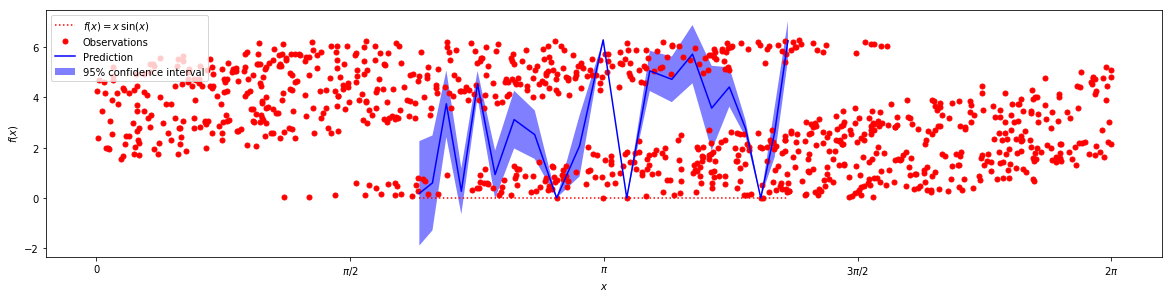

In [148]:
plt.figure(1, figsize=(20, 10))
plt.subplot(211)
plt.plot(x_test[:, 0], y_test, 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(x_train[:, 0], y_train, 'r.', markersize=10, label=u'Observations')
plt.plot(x_test[:, 0], p_gp, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x_test[:, 0], x_test[::-1, 0]]),
         np.concatenate([p_gp - sigma, (p_gp + sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
# plt.ylim(0, 2 * np.pi)
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ["0", u'$\pi/2$', u'$\pi$', u'$3 \pi/2$', '$2 \pi$'])
plt.legend(loc='upper left')

plt.show()